In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pylab as rcParams
plt.rcParams['figure.figsize']=(10,6)
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [2]:
train=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/1810026_ECE4100_IndustialTraining/WATER LUPA/acea-water-prediction//Canneto.csv')
train2=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/1810026_ECE4100_IndustialTraining/WATER LUPA/acea-water-prediction//Canneto2.csv')
train

,Date,Rainfall_Settefrati,Temperature_Settefrati,Flow_Rate_Madonna_di_Canneto
0,1/1/2012,0.0,5.25,NaN
1,2/1/2012,5.6,6.65,NaN
2,3/1/2012,10.0,8.85,NaN
3,4/1/2012,0.0,6.75,NaN
4,5/1/2012,1.0,5.55,NaN
...,...,...,...,...
3099,26/06/2020,NaN,NaN,223.919115
3100,27/06/2020,NaN,NaN,223.861787
3101,28/06/2020,NaN,NaN,223.764382
3102,29/06/2020,NaN,NaN,223.766272


In [417]:
train =train.drop('Rainfall_Settefrati', axis =1)
train =train.drop('Temperature_Settefrati', axis =1)
train = train[train.Flow_Rate_Madonna_di_Canneto.notna()].reset_index(drop=True)
train

,Date,Flow_Rate_Madonna_di_Canneto
0,13/03/2015,255.956525
1,14/03/2015,289.545561
2,15/03/2015,289.918615
3,16/03/2015,290.082896
4,17/03/2015,290.688777
...,...,...
1382,26/06/2020,223.919115
1383,27/06/2020,223.861787
1384,28/06/2020,223.764382
1385,29/06/2020,223.766272


In [223]:
train2.dtypes
train.describe()

,Flow_Rate_Madonna_di_Canneto
count,1387.000000
mean,263.160470
std,32.073660
min,187.753182
25%,224.659081
50%,277.045159
75%,290.165584
max,300.160983


In [221]:
#plt.figure(figsize=(9,4))
#sns.lineploFlow_Rate_Madonna_di_Canneto    t(x="Date",y='Flow_Rate_Madonna_di_Canneto',data=train)

<Axes: >

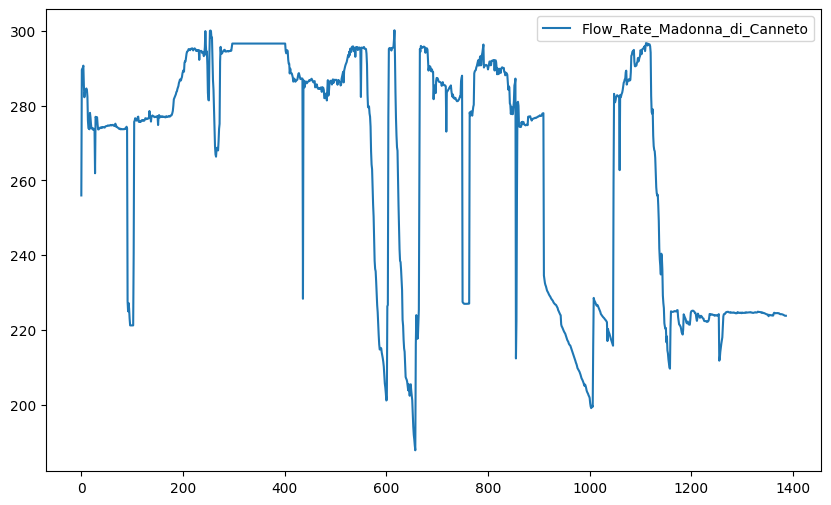

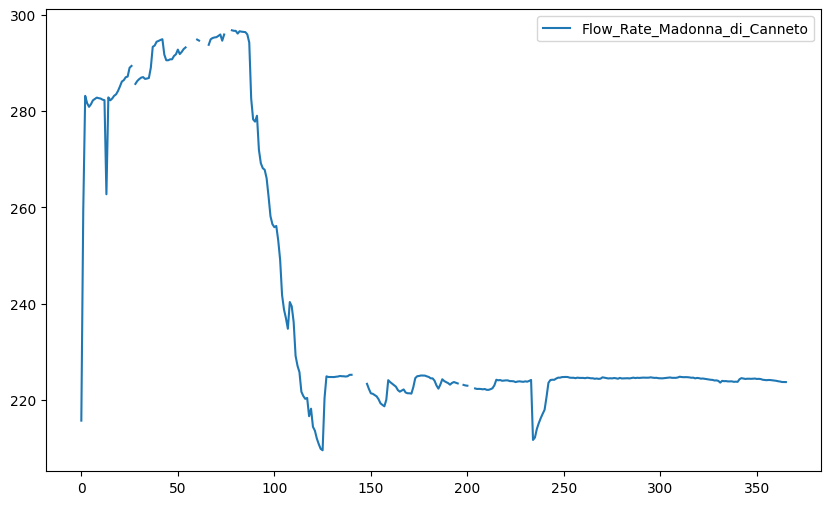

In [419]:
train2.describe()
train.plot()
train2.plot()
#sns.lineplot(x="Date",y='Flow_Rate_Madonna_di_Canneto',data=train)

<Axes: >

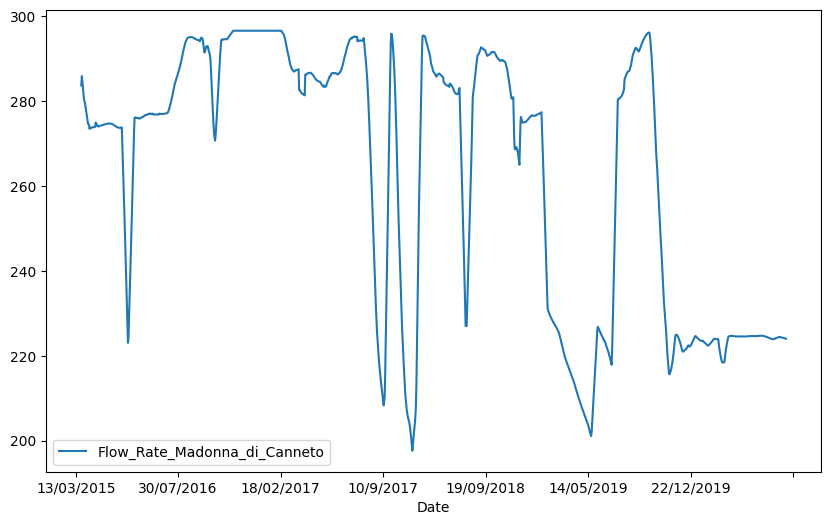

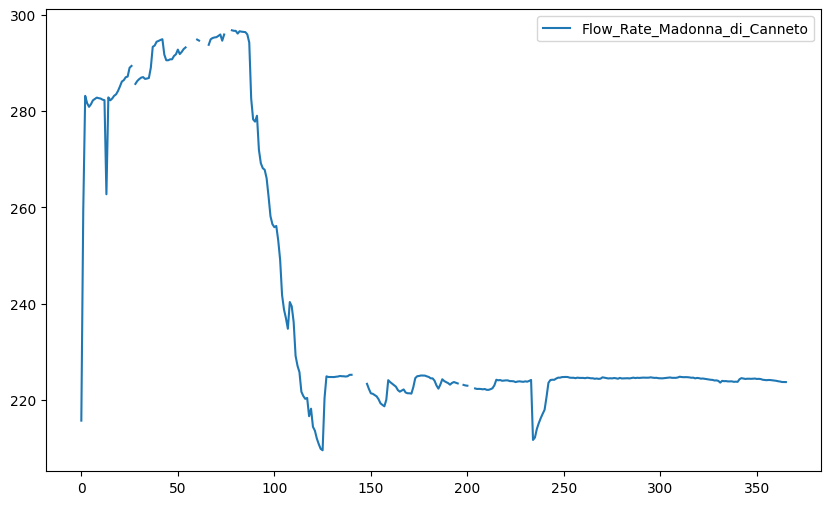

In [414]:


index=train.set_index('Date',inplace=False)



movingAverage = index.rolling(window=12).mean()
movingSTD = index.rolling(window=12).std()

movingAverage.plot()

train2.plot()

In [268]:
train.describe()         

,Flow_Rate_Madonna_di_Canneto
count,1387.000000
mean,263.160470
std,32.073660
min,187.753182
25%,224.659081
50%,277.045159
75%,290.165584
max,300.160983


In [270]:
movingAverage = indexedDataset.rolling(window=12).mean()
movingSTD = indexedDataset.rolling(window=12).std()

print(movingAverage,movingSTD)

            Flow_Rate_Madonna_di_Canneto
Date                                    
2015-03-13                           NaN
2015-03-14                           NaN
2015-03-15                           NaN
2015-03-16                           NaN
2015-03-17                           NaN
...                                  ...
2020-06-26                    224.187513
2020-06-27                    224.143042
2020-06-28                    224.087886
2020-06-29                    224.037249
2020-06-30                    223.997314

[1387 rows x 1 columns]             Flow_Rate_Madonna_di_Canneto
Date                                    
2015-03-13                           NaN
2015-03-14                           NaN
2015-03-15                           NaN
2015-03-16                           NaN
2015-03-17                           NaN
...                                  ...
2020-06-26                      0.153419
2020-06-27                      0.164604
2020-06-28                      

In [254]:
len(train)

1387

In [271]:
series=train['Flow_Rate_Madonna_di_Canneto'].values
series
series

array([255.956525 , 289.5455614, 289.9186152, ..., 223.7643823,
       223.7662716, 223.7526532])

In [65]:
type(series)

numpy.ndarray

In [291]:
len(train)

1387

In [292]:
train.tail()

,Date,Flow_Rate_Madonna_di_Canneto
1382,26/06/2020,223.919115
1383,27/06/2020,223.861787
1384,28/06/2020,223.764382
1385,29/06/2020,223.766272
1386,30/06/2020,223.752653


In [293]:
train.describe()

,Flow_Rate_Madonna_di_Canneto
count,1387.000000
mean,263.160470
std,32.073660
min,187.753182
25%,224.659081
50%,277.045159
75%,290.165584
max,300.160983


In [304]:
value=pd.DataFrame(series)
birth=pd.concat([value,value.shift(1)],axis=1)

,0
0,255.956525
1,289.545561
2,289.918615
3,290.082896
4,290.688777
...,...
1382,223.919115
1383,223.861787
1384,223.764382
1385,223.766272


In [295]:
birth.head()

,0,0
0,255.956525,NaN
1,289.545561,255.956525
2,289.918615,289.545561
3,290.082896,289.918615
4,290.688777,290.082896


In [257]:
birth.columns=['Actual_Birth','Delay_Birth']

In [258]:
birth.tail()

,Actual_Birth,Delay_Birth
1382,223.919115,224.013704
1383,223.861787,223.919115
1384,223.764382,223.861787
1385,223.766272,223.764382
1386,223.752653,223.766272


In [297]:
from sklearn.metrics import mean_squared_error
birth_test=birth[1:]
birth_test.head()

,0,0
1,289.545561,255.956525
2,289.918615,289.545561
3,290.082896,289.918615
4,290.688777,290.082896
5,285.417723,290.688777


In [260]:
 birth_error = mean_squared_error(birth_test.Actual_Birth,birth_test.Delay_Birth)

In [261]:
birth_error

30.57747649284133

In [262]:
np.sqrt(birth_error)

5.529690451810239

In [274]:
print('Results of Dickey Fuller Test:')
airpass_test = adfuller(train['Flow_Rate_Madonna_di_Canneto'], autolag='AIC')
dfoutput = pd.Series(airpass_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in airpass_test[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -3.271722
p-value                           0.016191
#Lags Used                        1.000000
Number of Observations Used    1385.000000
Critical Value (1%)              -3.435080
Critical Value (5%)              -2.863629
Critical Value (10%)             -2.567882
dtype: float64


In [298]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf


1387

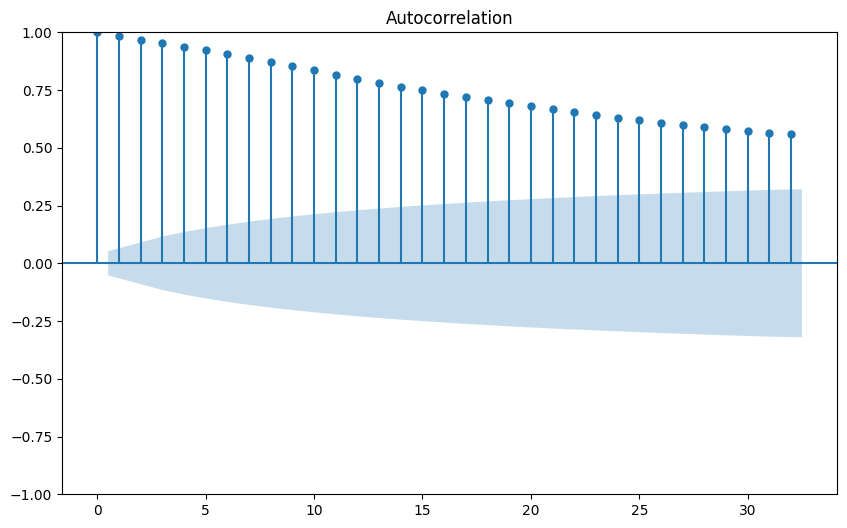

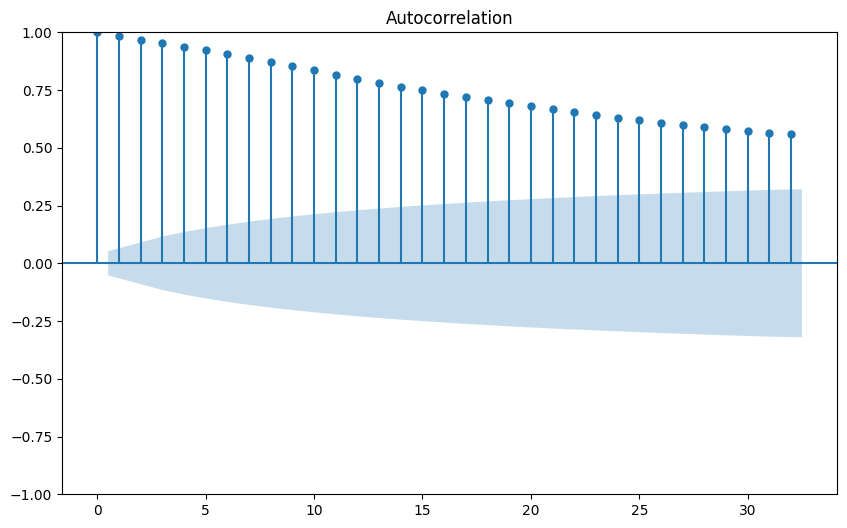

In [278]:
plot_acf(value)  #to identify q

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


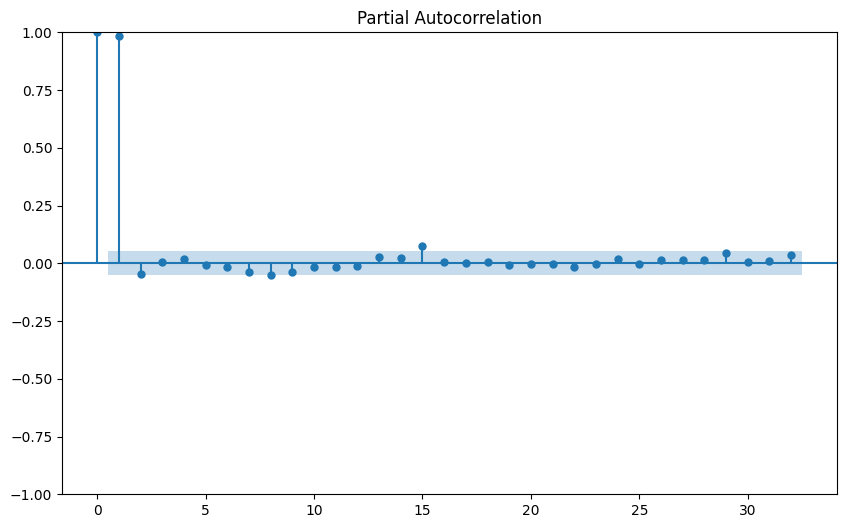

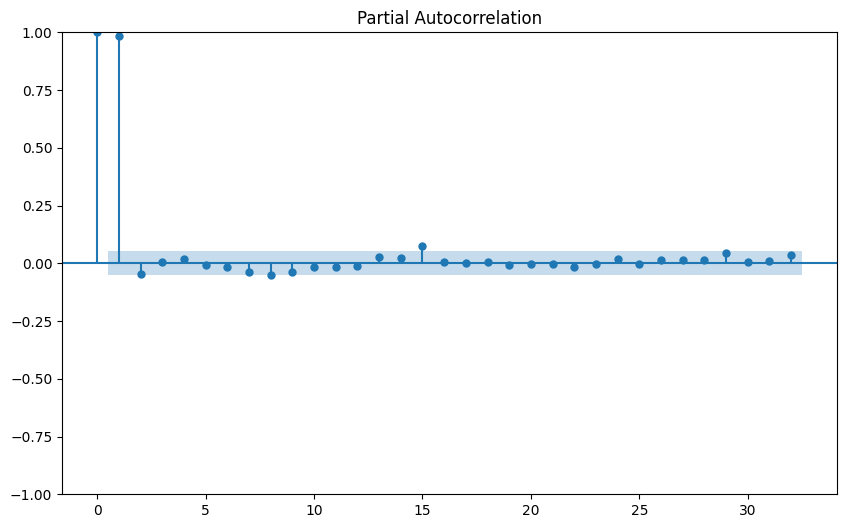

In [227]:
plot_pacf(value) #to identify p

In [305]:
value.size

1387

In [405]:
m_train=value[0:1350]
m_test=value[1350:1387]

In [406]:
m_train.size

1350

In [407]:
from statsmodels.tsa.arima.model import ARIMA

m_model = ARIMA(m_train,order=(1,1,3))

In [408]:
m_model_fit=m_model.fit()

In [409]:
m_model_fit.aic

8475.949217541314

In [410]:
flow_forecast = m_model_fit.forecast(steps = 37)

In [411]:
flow_forecast

1350    224.343363
1351    224.623268
1352    224.897701
1353    225.165616
1354    225.427167
1355    225.682507
1356    225.931782
1357    226.175137
1358    226.412712
1359    226.644644
1360    226.871068
1361    227.092114
1362    227.307910
1363    227.518581
1364    227.724248
1365    227.925031
1366    228.121045
1367    228.312403
1368    228.499217
1369    228.681594
1370    228.859639
1371    229.033455
1372    229.203143
1373    229.368801
1374    229.530525
1375    229.688408
1376    229.842540
1377    229.993012
1378    230.139910
1379    230.283320
1380    230.423323
1381    230.560001
1382    230.693433
1383    230.823696
1384    230.950865
1385    231.075013
1386    231.196213
Name: predicted_mean, dtype: float64

In [412]:
np.sqrt(mean_squared_error(m_test,flow_forecast))

4.5924435212587085

<Axes: >

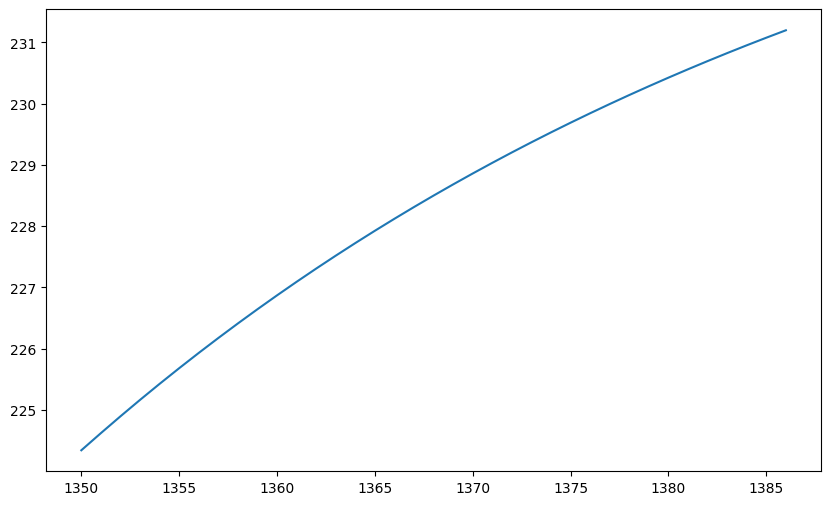

In [413]:
flow_forecast.plot()

In [415]:
print("Water_Spring_Madonna_di_Canneto Flow_Rate is found")

Water_Spring_Madonna_di_Canneto Flow_Rate is found
